In [1]:
## Import Packages
import numpy as np
import _pickle as pk
from matplotlib import pyplot as plt
import matplotlib as mpl
from netCDF4 import Dataset
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import os 

plt.rcParams['axes.xmargin'] = 0 #default margin spacing for the edges
mpl.rc('font',size=40,**{'family':'sans-serif','sans-serif':['Arial']})
%matplotlib inline

In [2]:
Source = Source = '/Volumes/eSSD0/Papers/GMD_CanESM_p1/Data/'

In [4]:
mask_source = '/Volumes/eSSD0/Papers/GMD_CanESM_p2/Analysis/Control/'
mask_dict = pk.load(open(mask_source+'results/CanESM5_CCF_picon.pi','rb'))
mask = np.isnan(np.nanmean(mask_dict['TADV'],axis=0))

lat = np.linspace(-87.864,87.864,64)
lon = np.linspace(0,357.1875,128)

y = lat*np.pi/180
coslat = np.cos(y)
coslat = np.tile(coslat,(lon.size,1)).T

<ipython-input-4-b1a8275e0da8>:3: RuntimeWarning: Mean of empty slice
  mask = np.isnan(np.nanmean(mask_dict['TADV'],axis=0))


In [15]:
mods = ['CanESM5_p2','CanESM2']

alb = {}
for m in range(2):
    alb[mods[m]] = pk.load(open(Source+mods[m]+'/Fluxes/'+mods[m]+'_TrALB_FLUX_FB_Grid.pi','rb'))

    alb[mods[m]].pop('CAM3')
    alb[mods[m]].pop('CAM5')
    alb[mods[m]].pop('ECHAM6_ctr')

In [117]:
alb_kmn = {}
alb_pa = {}
alb_plot = {}
for models in alb.keys():
    alb_kmn[models] = np.mean(list(alb[models].values()),axis=0)
    alb_pa[models] = np.average(alb_kmn[models][54:,:],weights=coslat[54:,:])
    alb_plot[models],lon_cyc = add_cyclic_point(alb_kmn[models],lon)

delta = alb_pa['CanESM5_p2']-alb_pa['CanESM2']

In [90]:
test = np.ones([64,128])

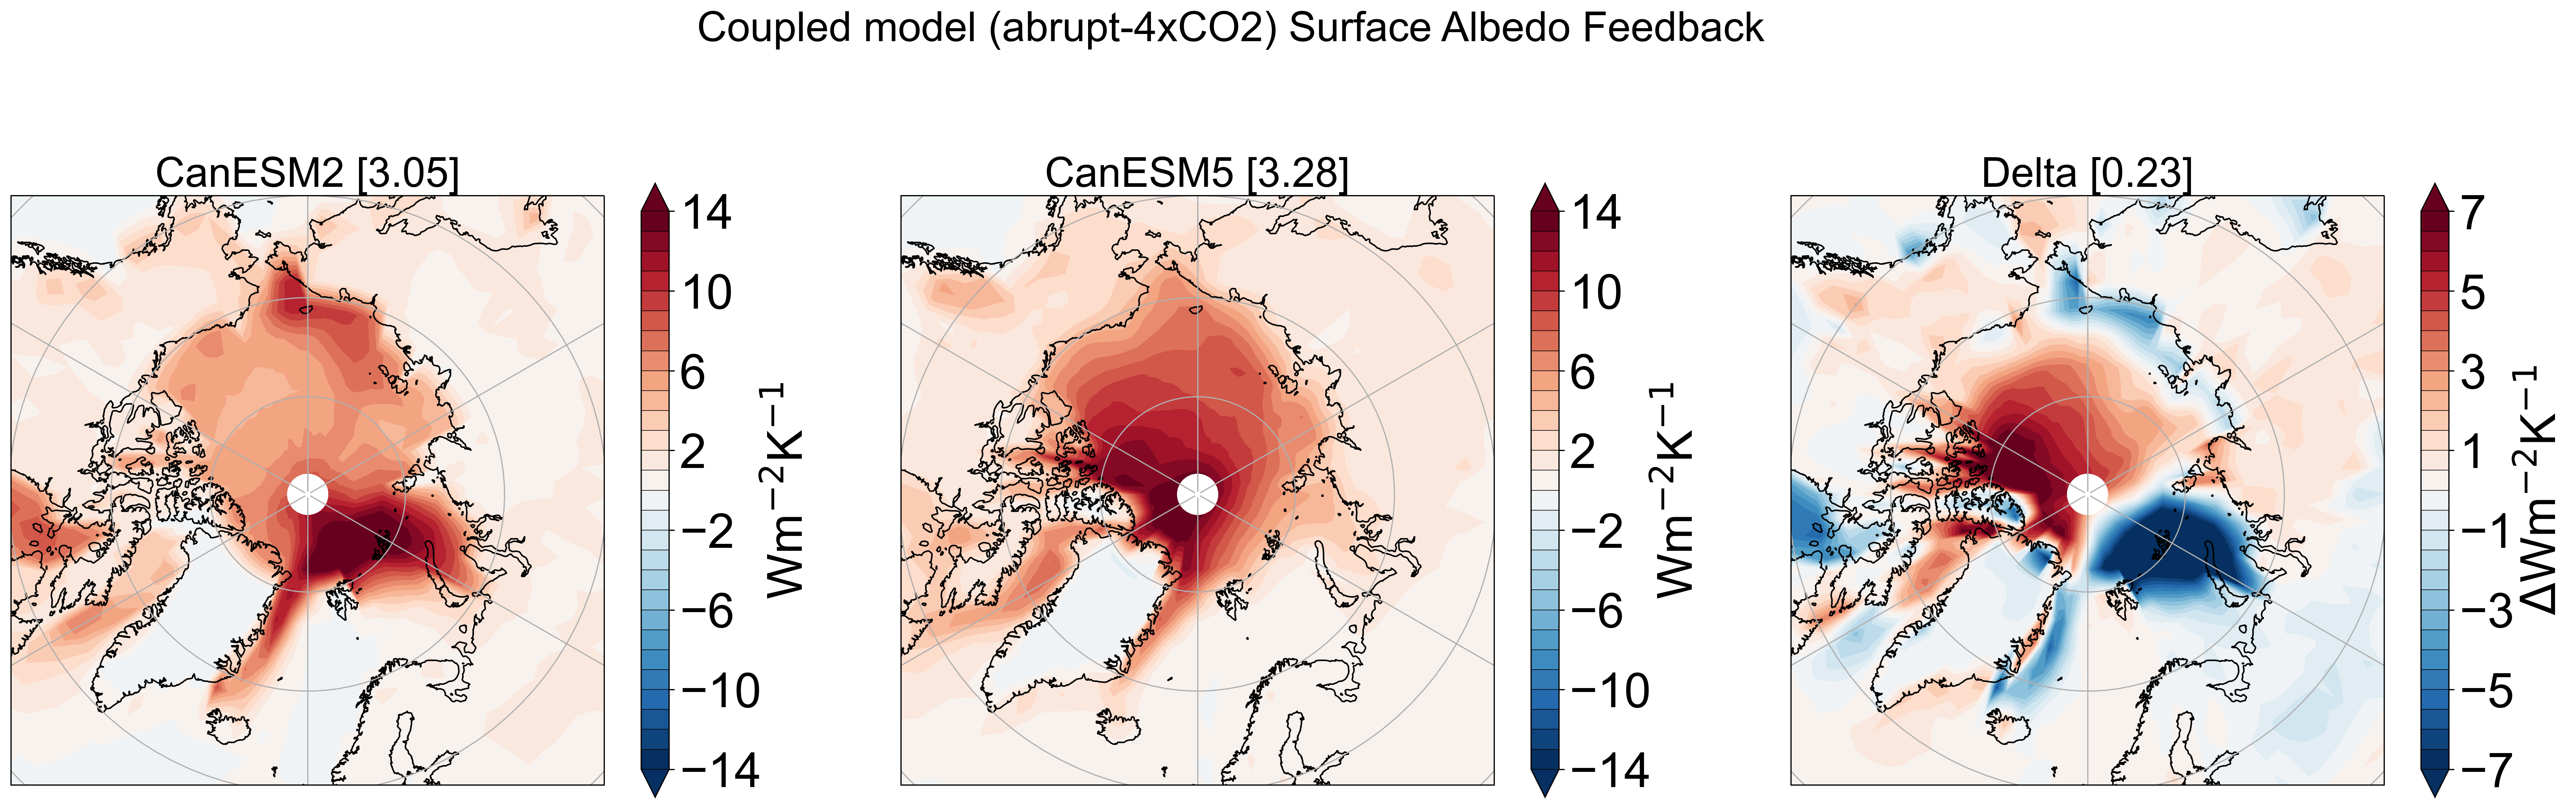

In [125]:
mpl.rc('font',size=23,**{'family':'sans-serif','sans-serif':['Arial']})

bounds = np.arange(-14,14.1,1)
bounds_ticks = np.arange(-14,14.1,4)
cmap = plt.cm.RdBu_r
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

bounds_diff = np.arange(-7,7.1,0.5)
bounds_diff_ticks = np.arange(-7,7.1,2)
norm_diff = mpl.colors.BoundaryNorm(bounds_diff, cmap.N)


theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpl.path.Path(verts * radius + center)

fig = plt.figure(figsize=(30,30),dpi=300)
plt.suptitle('Coupled model (abrupt-4xCO2) Surface Albedo Feedback',y=0.65)
#gs = gridspec.GridSpec(3,2, width_ratios=[0.6,1],height_ratios=[1,1,1]) 

#CanESM2
ax = plt.subplot(131,projection=ccrs.NorthPolarStereo())
ax.coastlines()
ax.gridlines()
ax.set_extent([-180, 180, 60, 90], ccrs.PlateCarree())
#ax.set_boundary(circle, transform=ax.transAxes)
ax.set_title('CanESM2 [{}]'.format(round(alb_pa['CanESM2'],2)))
im = ax.contourf(lon_cyc,lat,alb_plot['CanESM2'],bounds,transform=ccrs.PlateCarree(),cmap=cmap,norm=norm,extend='both')
cbar = plt.colorbar(im,ticks=bounds_ticks,drawedges=True,shrink=0.25)
cbar.set_label('Wm$^{-2}$K$^{-1}$',fontsize=32)
cbar.ax.tick_params(labelsize=32)

#CanESM5
ax1 = plt.subplot(132,projection=ccrs.NorthPolarStereo())
ax1.coastlines()
ax1.gridlines()
ax1.set_extent([-180, 180, 60, 90], ccrs.PlateCarree())
#ax1.set_boundary(circle, transform=ax.transAxes)
ax1.set_title('CanESM5 [{}]'.format(round(alb_pa['CanESM5_p2'],2)))
im1 = ax1.contourf(lon_cyc,lat,alb_plot['CanESM5_p2'],bounds,transform=ccrs.PlateCarree(),cmap=cmap,norm=norm,extend='both')
cbar1 = plt.colorbar(im1,ticks=bounds_ticks,drawedges=True,shrink=0.25)
cbar1.set_label('Wm$^{-2}$K$^{-1}$',fontsize=32)
cbar1.ax.tick_params(labelsize=32)

#Delta
ax2 = plt.subplot(133,projection=ccrs.NorthPolarStereo())
ax2.coastlines()
ax2.gridlines()
ax2.set_extent([-180, 180, 60, 90], ccrs.PlateCarree())
#ax1.set_boundary(circle, transform=ax.transAxes)
ax2.set_title('Delta [{}]'.format(round(delta,2)))
im2 = ax2.contourf(lon_cyc,lat,alb_plot['CanESM5_p2']-alb_plot['CanESM2'],bounds_diff,transform=ccrs.PlateCarree(),cmap=cmap,norm=norm_diff,extend='both')
cbar2 = plt.colorbar(im2,ticks=bounds_diff_ticks,drawedges=True,shrink=0.25)
cbar2.set_label('$\Delta$Wm$^{-2}$K$^{-1}$',fontsize=32)
cbar2.ax.tick_params(labelsize=32)

plt.savefig('SALB_polar_map.png',bbox_inches='tight')